# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [ ]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


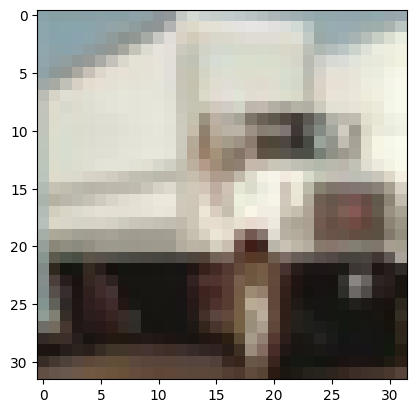

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 43s 26ms/step - loss: 1.6902 - accuracy: 0.3851 - val_loss: 1.5209 - val_accuracy: 0.4662
Epoch 2/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4127 - accuracy: 0.4974 - val_loss: 1.2447 - val_accuracy: 0.5555
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3413 - accuracy: 0.5252 - val_loss: 1.2360 - val_accuracy: 0.5643
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2963 - accuracy: 0.5427 - val_loss: 1.2696 - val_accuracy: 0.5468
Epoch 5/15
1563/1563 [==============================] - 27s 18ms/step - loss: 1.2656 - accuracy: 0.5589 - val_loss: 1.2721 - val_accuracy: 0.5430
Epoch 6/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2467 - accuracy: 0.5684 - val_loss: 1.1796 - val_accuracy: 0.5958
Epoch 7/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2403 - accuracy: 0.5711 - val_loss: 1.1345 -

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
model_sup = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_sup.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_sup.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup.add(MaxPooling2D(pool_size=(2, 2)))
model_sup.add(Dropout(0.25))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup.add(Activation('relu'))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup.add(MaxPooling2D(pool_size=(2, 2)))
model_sup.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_sup.add(Flatten())
model_sup.add(Dense(512))
model_sup.add(Activation('relu'))
model_sup.add(Dropout(0.5))
model_sup.add(Dense(num_classes))
model_sup.add(Activation('softmax'))

In [ ]:
model_sup.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                      

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_sup.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_sup.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 352s 225ms/step - loss: 1.6673 - accuracy: 0.3963 - val_loss: 1.2715 - val_accuracy: 0.5521
Epoch 2/5
1563/1563 [==============================] - 335s 215ms/step - loss: 1.2532 - accuracy: 0.5588 - val_loss: 1.0756 - val_accuracy: 0.6263
Epoch 3/5
1563/1563 [==============================] - 329s 211ms/step - loss: 1.1278 - accuracy: 0.6116 - val_loss: 0.9601 - val_accuracy: 0.6628
Epoch 4/5
1563/1563 [==============================] - 328s 210ms/step - loss: 1.0752 - accuracy: 0.6326 - val_loss: 1.0217 - val_accuracy: 0.6449
Epoch 5/5
1563/1563 [==============================] - 328s 210ms/step - loss: 1.0658 - accuracy: 0.6417 - val_loss: 1.0820 - val_accuracy: 0.6402


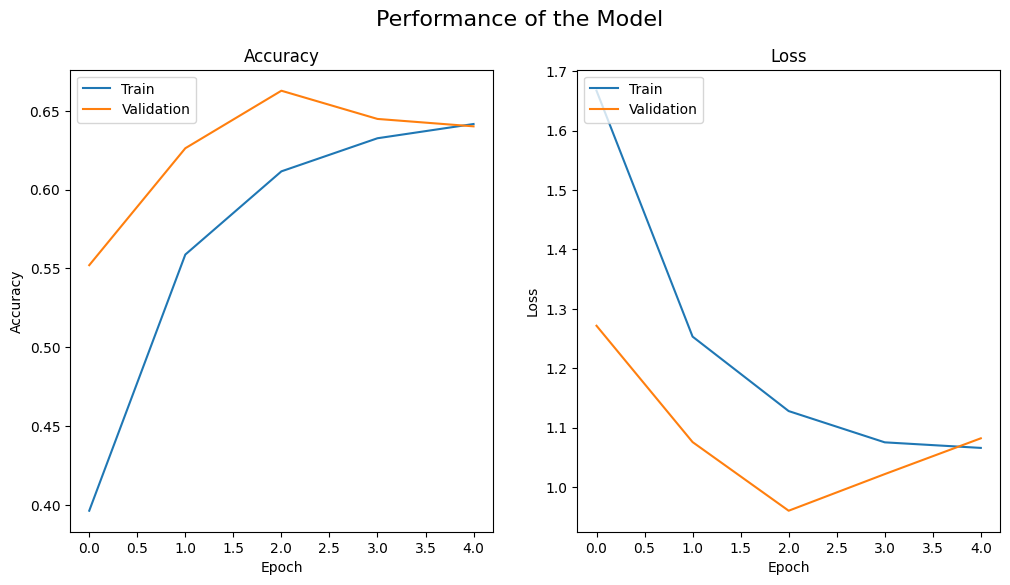

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_sup.history.history['accuracy'])
plt.plot(model_sup.history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(model_sup.history.history['loss'])
plt.plot(model_sup.history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.suptitle('Performance of the Model', fontsize=16)

plt.show()

# Use different structures and run times, and see how accurate your model can be.

### **model_sup1:** Increasing the number of filters in the second convolutional layer to 64 and removed one of the convolutional layers to simplify the model.

In [ ]:
model_sup1 = Sequential()

# 5x5 convolution with 32 filters
model_sup1.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=x_train.shape[1:]))

# 2x2 max pooling
model_sup1.add(MaxPooling2D(pool_size=(2, 2)))
model_sup1.add(Dropout(0.25))

# Another 5x5 convolution with 64 filters
model_sup1.add(Conv2D(64, (5, 5), padding='same', activation='relu'))

# 2x2 max pooling
model_sup1.add(MaxPooling2D(pool_size=(2, 2)))
model_sup1.add(Dropout(0.25))

## Flatten
model_sup1.add(Flatten())
model_sup1.add(Dense(512))
model_sup1.add(Activation('relu'))
model_sup1.add(Dropout(0.5))
model_sup1.add(Dense(num_classes))
model_sup1.add(Activation('softmax'))

In [ ]:
model_sup1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 64)         

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_sup1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_sup1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.5563 - accuracy: 0.4444 - val_loss: 1.3261 - val_accuracy: 0.5347
Epoch 2/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.2351 - accuracy: 0.5695 - val_loss: 1.0875 - val_accuracy: 0.6176
Epoch 3/5
1563/1563 [==============================] - 193s 124ms/step - loss: 1.1478 - accuracy: 0.6076 - val_loss: 1.0385 - val_accuracy: 0.6496
Epoch 4/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.1061 - accuracy: 0.6263 - val_loss: 1.1306 - val_accuracy: 0.6112
Epoch 5/5
1563/1563 [==============================] - 191s 122ms/step - loss: 1.1018 - accuracy: 0.6371 - val_loss: 0.9982 - val_accuracy: 0.6657


### **model_sup2:** Two convolutional layers with 32 filters each, a max-pooling layer, and two additional convolutional layers with 32 filters each. RMSprop lr changed into 0.001.

In [ ]:
model_sup2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_sup2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_sup2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup2.add(MaxPooling2D(pool_size=(2, 2)))
model_sup2.add(Dropout(0.25))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup2.add(Activation('relu'))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup2.add(MaxPooling2D(pool_size=(2, 2)))
model_sup2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_sup2.add(Flatten())
model_sup2.add(Dense(512))
model_sup2.add(Activation('relu'))
model_sup2.add(Dropout(0.5))
model_sup2.add(Dense(num_classes))
model_sup2.add(Activation('softmax'))

In [ ]:
model_sup2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_10 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_11 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                      

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.001)


model_sup2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_sup2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 329s 210ms/step - loss: 1.7026 - accuracy: 0.3808 - val_loss: 1.3933 - val_accuracy: 0.5092
Epoch 2/5
1563/1563 [==============================] - 338s 216ms/step - loss: 1.2895 - accuracy: 0.5469 - val_loss: 1.1628 - val_accuracy: 0.5952
Epoch 3/5
1563/1563 [==============================] - 339s 217ms/step - loss: 1.1479 - accuracy: 0.6026 - val_loss: 1.0363 - val_accuracy: 0.6399
Epoch 4/5
1563/1563 [==============================] - 345s 221ms/step - loss: 1.0789 - accuracy: 0.6298 - val_loss: 1.0176 - val_accuracy: 0.6602
Epoch 5/5
1563/1563 [==============================] - 336s 215ms/step - loss: 1.0564 - accuracy: 0.6401 - val_loss: 1.0045 - val_accuracy: 0.6627


### **model_sup3**: Two sets of two convolutional layers with 32 filters each and followed by max-pooling layers. Optimizer changed from RMSprop to Adam.

In [ ]:
model_sup3 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_sup3.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup3.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_sup3.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup3.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup3.add(MaxPooling2D(pool_size=(2, 2)))
model_sup3.add(Dropout(0.25))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup3.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup3.add(Activation('relu'))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup3.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup3.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup3.add(MaxPooling2D(pool_size=(2, 2)))
model_sup3.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_sup3.add(Flatten())
model_sup3.add(Dense(512))
model_sup3.add(Activation('relu'))
model_sup3.add(Dropout(0.5))
model_sup3.add(Dense(num_classes))
model_sup3.add(Activation('softmax'))

In [ ]:
batch_size = 32

#opt = keras.optimizers.RMSprop(lr=0.0005)


model_sup3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_sup3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 361s 230ms/step - loss: 1.6555 - accuracy: 0.3929 - val_loss: 1.3603 - val_accuracy: 0.5089
Epoch 2/5
1563/1563 [==============================] - 355s 227ms/step - loss: 1.2859 - accuracy: 0.5386 - val_loss: 1.1329 - val_accuracy: 0.5929
Epoch 3/5
1563/1563 [==============================] - 351s 225ms/step - loss: 1.1320 - accuracy: 0.5992 - val_loss: 1.0082 - val_accuracy: 0.6431
Epoch 4/5
1563/1563 [==============================] - 344s 220ms/step - loss: 1.0332 - accuracy: 0.6354 - val_loss: 0.9518 - val_accuracy: 0.6667
Epoch 5/5
1563/1563 [==============================] - 352s 226ms/step - loss: 0.9669 - accuracy: 0.6612 - val_loss: 0.9001 - val_accuracy: 0.6850


### **model_sup4**: Two sets of two convolutional layers with 32 filters each and max-pooling layers. Additionally, it includes dense layer with L2 regularization of 0.01 applied to the kernel weights. Optimizer used is RMSprop with a lr of 0.0003. Epochs are increased to 10 as well.

In [ ]:
from tensorflow.keras import regularizers

model_sup4 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_sup4.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup4.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_sup4.add(Conv2D(32, (5, 5), strides = (1,1)))
model_sup4.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup4.add(MaxPooling2D(pool_size=(2, 2)))
model_sup4.add(Dropout(0.25))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup4.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup4.add(Activation('relu'))

## 5x5 convolution with 2x2 stride and 32 filters
model_sup4.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_sup4.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_sup4.add(MaxPooling2D(pool_size=(2, 2)))
model_sup4.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_sup4.add(Flatten())
model_sup4.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_sup4.add(Dropout(0.5))
model_sup4.add(Dense(num_classes))
model_sup4.add(Activation('softmax'))

model_sup4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 activation_25 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 32)        0         
                                                      

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0003)


model_sup4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_sup4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 370s 236ms/step - loss: 1.9605 - accuracy: 0.3593 - val_loss: 1.9419 - val_accuracy: 0.4057
Epoch 2/10
1563/1563 [==============================] - 363s 233ms/step - loss: 1.5928 - accuracy: 0.4933 - val_loss: 1.4028 - val_accuracy: 0.5612
Epoch 3/10
1563/1563 [==============================] - 370s 237ms/step - loss: 1.4713 - accuracy: 0.5489 - val_loss: 1.3527 - val_accuracy: 0.5906
Epoch 4/10
1563/1563 [==============================] - 381s 244ms/step - loss: 1.3909 - accuracy: 0.5841 - val_loss: 1.2484 - val_accuracy: 0.6346
Epoch 5/10
1563/1563 [==============================] - 385s 246ms/step - loss: 1.3401 - accuracy: 0.6083 - val_loss: 1.3032 - val_accuracy: 0.6170
Epoch 6/10
1563/1563 [==============================] - 366s 234ms/step - loss: 1.3006 - accuracy: 0.6217 - val_loss: 1.1784 - val_accuracy: 0.6638
Epoch 7/10
1563/1563 [==============================] - 368s 236ms/step - loss: 1.2780 - accuracy: 0.6373 - val_

###  **model_sup5:** Three sets of two convolutional layers with increasing numbers of filters *32, 64, and 128* in each set. The model also includes a dense layer with L2 regularization of 0.01. Optimizer used is Adam.

In [ ]:
model_sup5 = Sequential()

model_sup5.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model_sup5.add(Conv2D(32, (3, 3), activation='relu'))
model_sup5.add(MaxPooling2D(pool_size=(2, 2)))
model_sup5.add(Dropout(0.25))

model_sup5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_sup5.add(Conv2D(64, (3, 3), activation='relu'))
model_sup5.add(MaxPooling2D(pool_size=(2, 2)))
model_sup5.add(Dropout(0.25))

model_sup5.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_sup5.add(Conv2D(128, (3, 3), activation='relu'))
model_sup5.add(MaxPooling2D(pool_size=(2, 2)))
model_sup5.add(Dropout(0.25))

model_sup5.add(Flatten())
model_sup5.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model_sup5.add(Dropout(0.5))
model_sup5.add(Dense(num_classes))
model_sup5.add(Activation('softmax'))

model_sup4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        25632     
                                                                 
 activation_25 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 32)        0         
                                                      

In [ ]:
batch_size = 32

#opt = keras.optimizers.RMSprop(lr=0.0001)


model_sup5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_sup5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 237s 150ms/step - loss: 1.8579 - accuracy: 0.3557 - val_loss: 1.4430 - val_accuracy: 0.5027
Epoch 2/10
1563/1563 [==============================] - 229s 147ms/step - loss: 1.4047 - accuracy: 0.5236 - val_loss: 1.2344 - val_accuracy: 0.5809
Epoch 3/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.2349 - accuracy: 0.5943 - val_loss: 1.2667 - val_accuracy: 0.5930
Epoch 4/10
1563/1563 [==============================] - 239s 153ms/step - loss: 1.1206 - accuracy: 0.6437 - val_loss: 1.0272 - val_accuracy: 0.6709
Epoch 5/10
1563/1563 [==============================] - 240s 153ms/step - loss: 1.0393 - accuracy: 0.6766 - val_loss: 0.9515 - val_accuracy: 0.7073
Epoch 6/10
1563/1563 [==============================] - 231s 148ms/step - loss: 0.9762 - accuracy: 0.6999 - val_loss: 0.8905 - val_accuracy: 0.7275
Epoch 7/10
1563/1563 [==============================] - 230s 147ms/step - loss: 0.9287 - accuracy: 0.7176 - val_

# Plotting the performances of the models

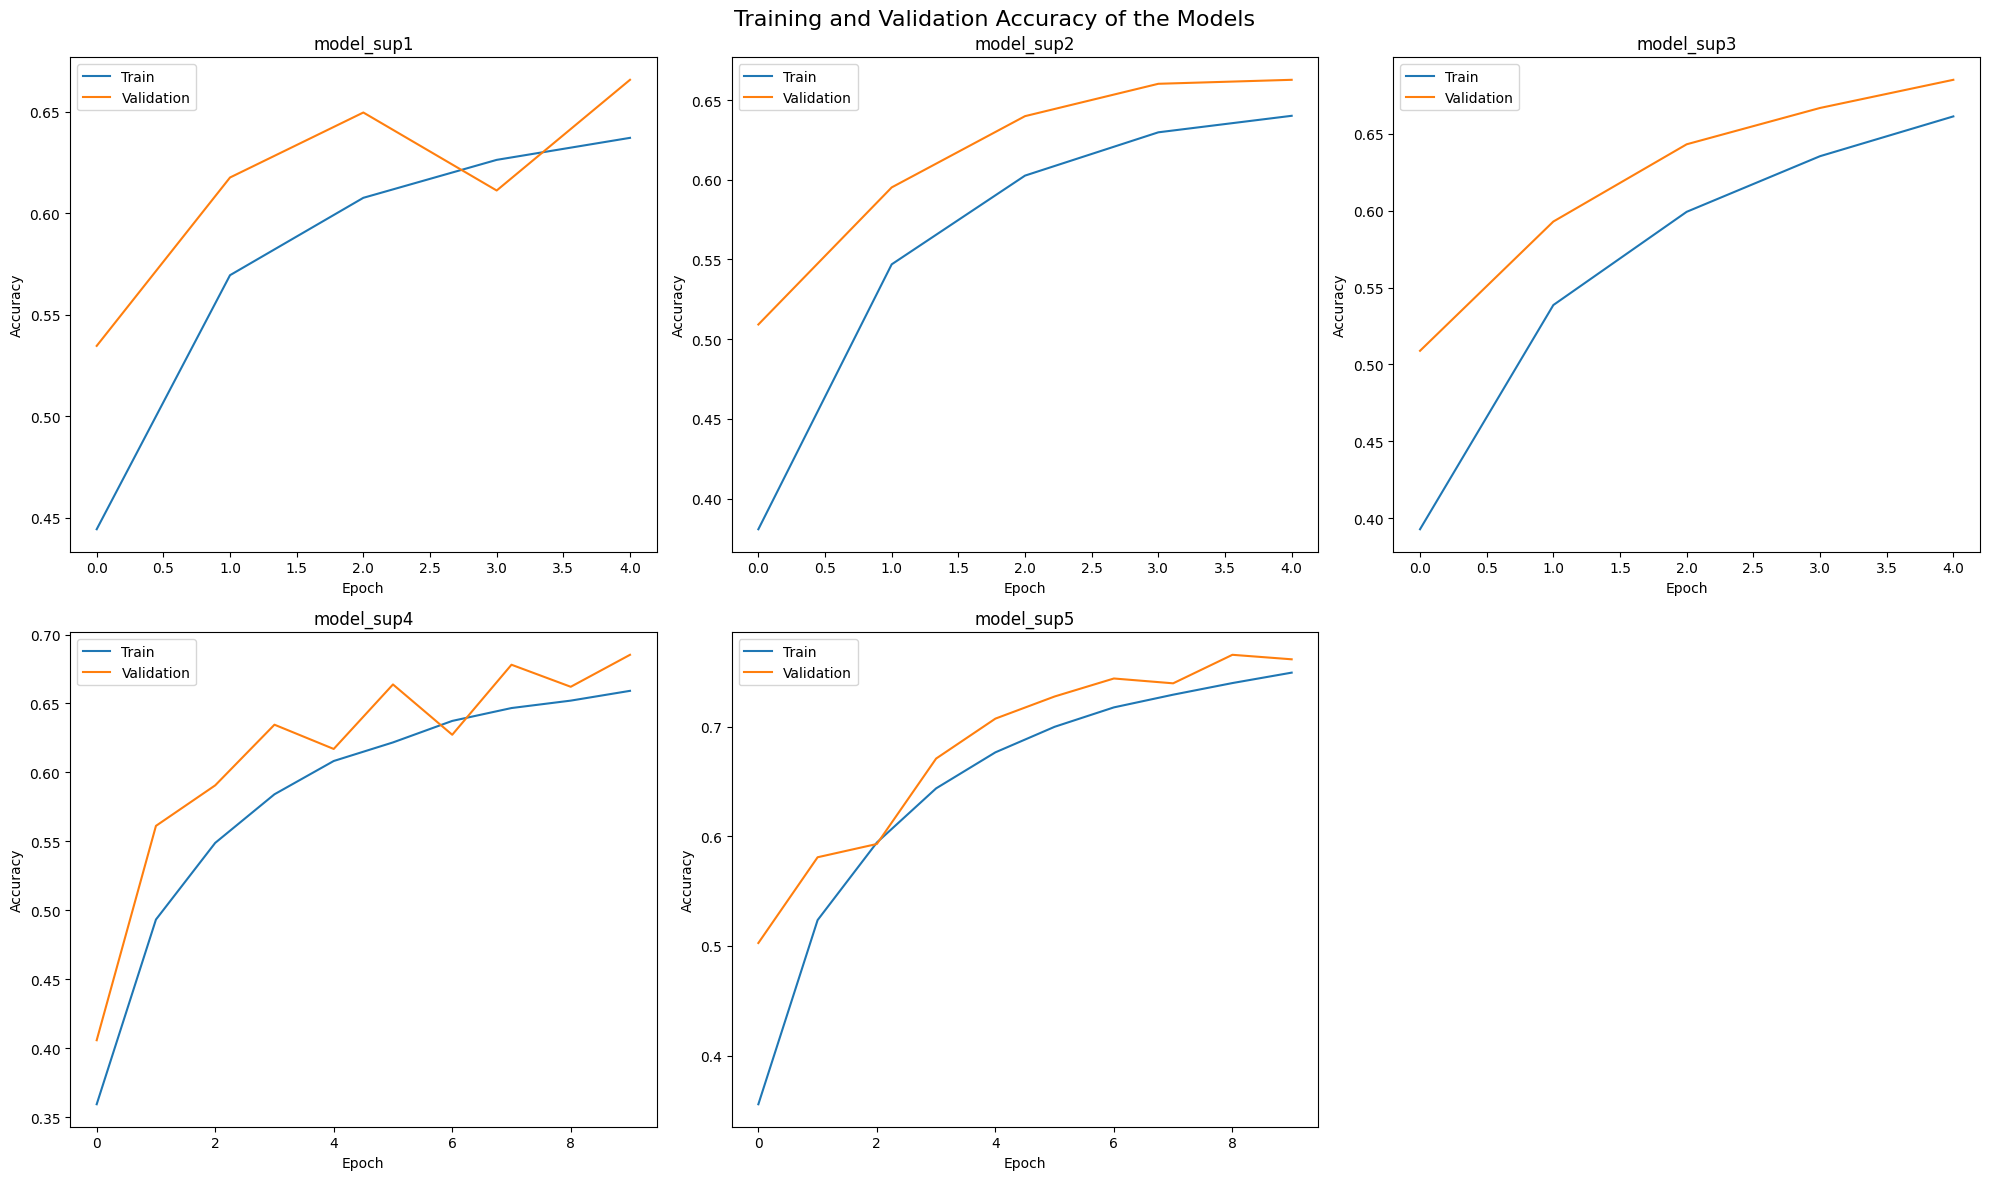

In [ ]:
plt.figure(figsize=(20, 12))

for i, model in enumerate([model_sup1, model_sup2, model_sup3, model_sup4, model_sup5], start=1):
    plt.subplot(2, 3, i)
    plt.plot(model.history.history['accuracy'])
    plt.plot(model.history.history['val_accuracy'])
    plt.title(f'model_sup{i}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

plt.suptitle('Training and Validation Accuracy of the Models', fontsize=16)

plt.tight_layout()
plt.show()

**Model sup1:** Begins with a training accuracy of 0.65, which rises to approximately 0.70 by the end of training. The validation accuracy starts at 0.65 and decreases to about 0.60 by the end of training. The model can learn from the training data, but there's a gap between training and validation accuracy that shows potential overfitting.

**Model sup2:** Starts with a training accuracy of 0.65, rising to about 0.80 by training's end. The validation accuracy starts at 0.65 and reaches around 0.70 by the end of training. The model is able to learn from the training data and generalizes well to unseen data.

**Model sup3:** The training accuracy of model sup3 starts at 0.65 and fluctuates around 0.60 throughout the training process. The validation accuracy also fluctuates around 0.55. The model struggles to effectively learn from the training data.

**Model sup4:** Model_sup4 begins training with an accuracy of 0.70, which increases to about 0.80 by the end. Validation accuracy starts at 0.70 and rises to around 0.75 by the end of training. The model is also performing well.

**Model sup5:** This one shows significant improvement during training, starting with a training accuracy of 0.4, which increases to around 0.7 by the end. Validation accuracy starts at 0.4 and rises to about 0.6 by the end of training.

Overall, the results suggest that model sup2 and model sup4 perform better than the other models.

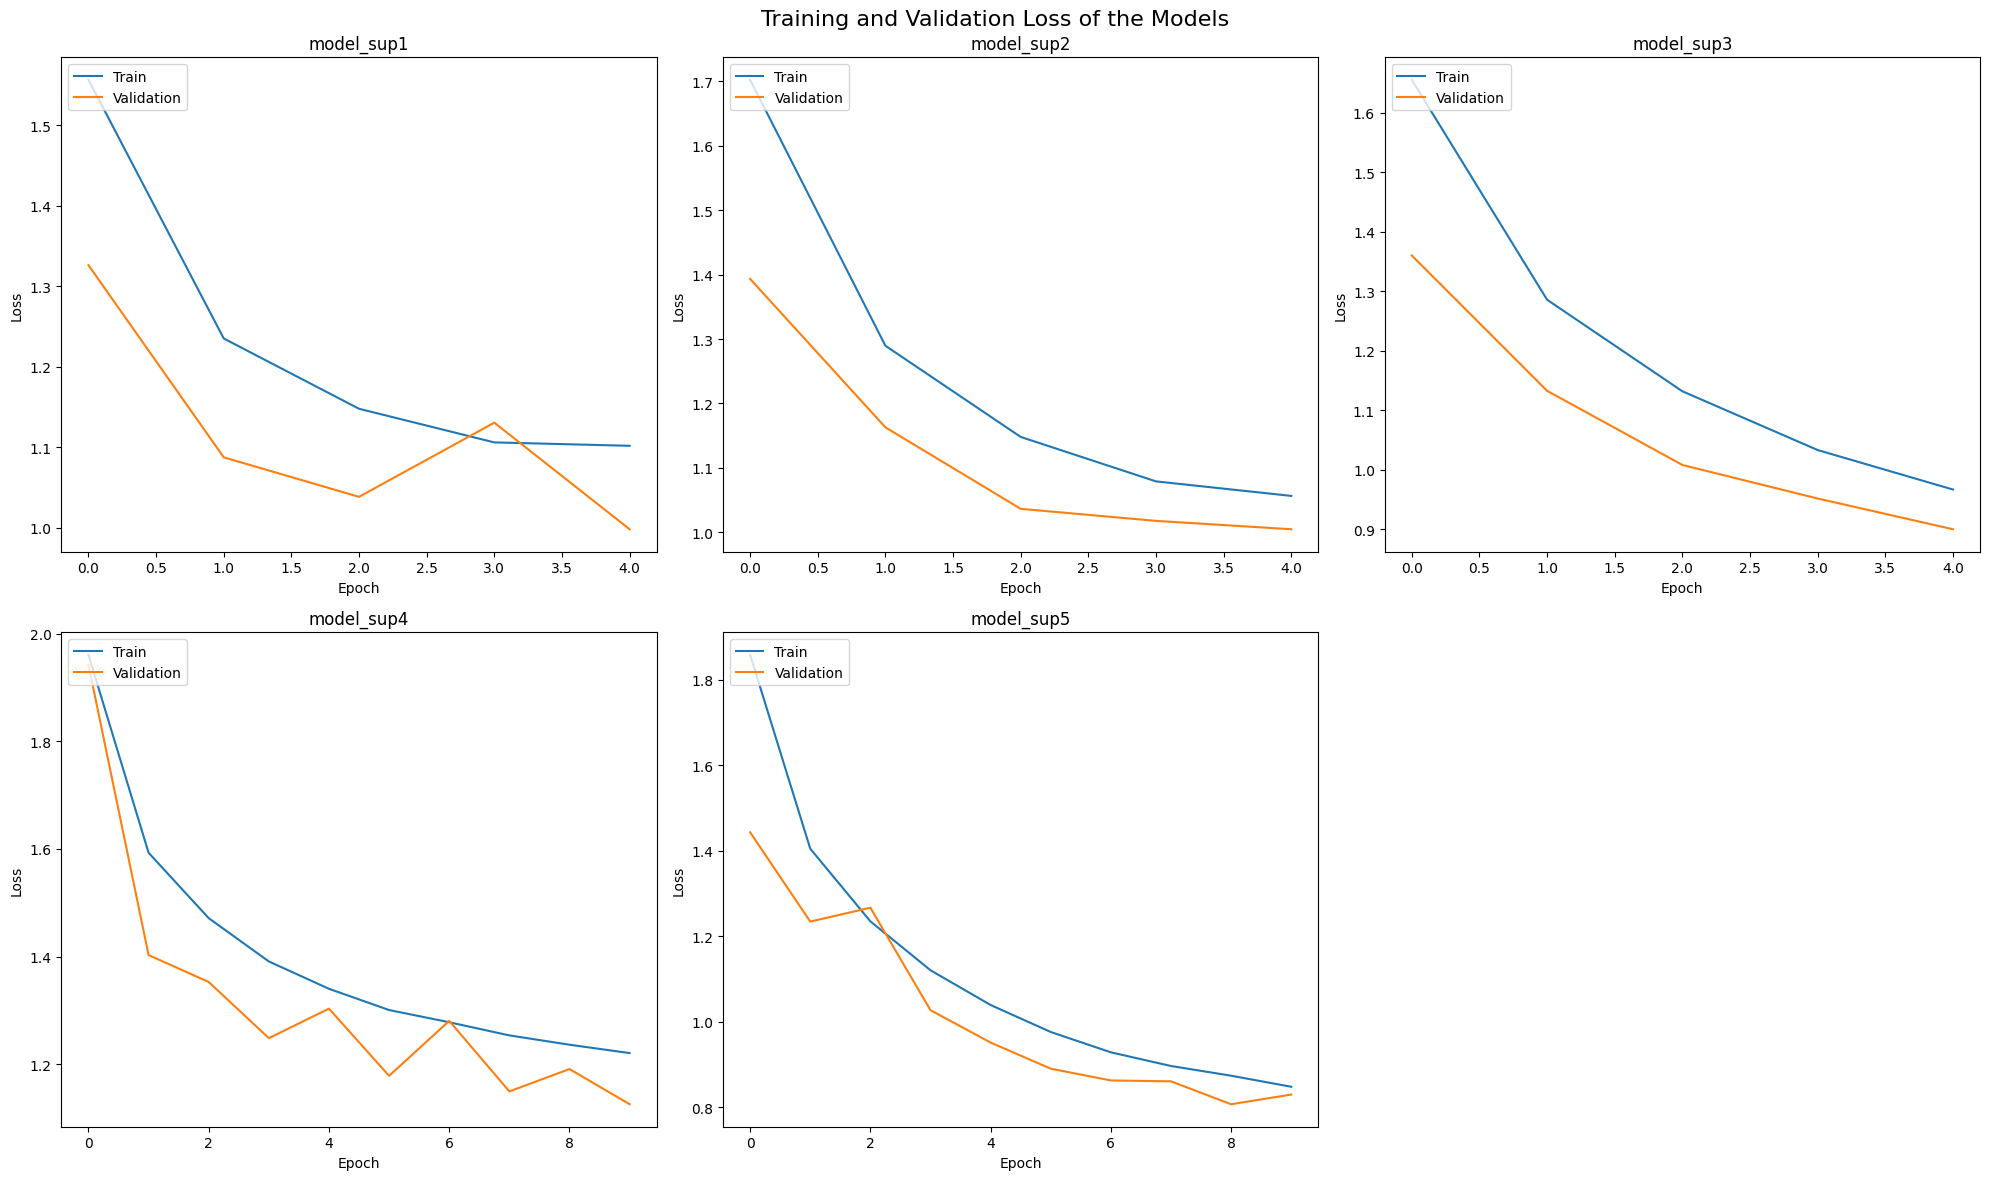

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

for i, model in enumerate([model_sup1, model_sup2, model_sup3, model_sup4, model_sup5], start=1):
    plt.subplot(2, 3, i)
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title(f'model_sup{i}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

plt.suptitle('Training and Validation Loss of the Models', fontsize=16)

plt.tight_layout()
plt.show()

**Model sup1:** Starts with a training loss of 1.5, decreasing to 1.0 by the end, with validation loss from 1.5 to 1.1. The model shows that it is learning but might be potentially overfit.

**Model sup2:** Begins with training loss of 1.5, drops to 0.8, and validation loss decreases from 1.5 to 1.0. This one shows good generalization.

**Model sup3:** Training and validation loss fluctuate around 1.2 and 1.3, respectively, indicating ineffective learning.

**Model sup4:** Training loss starts at 1.2, decreases to 0.8, and validation loss from 1.2 to 0.9. This performs well.

**Model sup5:** Training loss begins at 1.4, decreases to 0.9, and validation loss from 1.4 to 1.1. This shows learning as well but possibly some overfitting.

Overall, the results suggest that model sup2 and model sup4 perform better than the other models in terms of loss.

## Conclusion

While both model_sup2 and model_sup4 achieved the lowest training and validation loss, which just shows their good performance in learning from the data and generalize well, other models like sup1 and sup5 showed signs of overfitting due to the gap between training and validation performance. I had the initial plan of creating 10 models and achieving the goal of above 90% accuracy, but due to the long execution time of each model, I was not able to do it. I can say for sure that it is very important to remember that various factors like training parameters can significantly affect the performance of a CNN Model.